# Examples of basic distributions and plotting techniques

Will cover:

* distributions
    * uniform
    * normal
    * binomial
* histograms
    * using matplotlib.pyplot.hist()
    * using np.histogram()
    * error bars
    * normalization 


In [1]:
# Boilerplate
%matplotlib inline
import scipy
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

# Basic Statistical Distributions

In [2]:
# Initialize the random seed.  As long as this remainst the same, the output will remain the same
np.random.seed(57884776)

# Uniform distribution

s[:5]=  [0.58798606 0.41969041 0.22327461 0.19860196 0.2643132 ]
Average bin contents = 10000.00
Standard deviation = 95.779


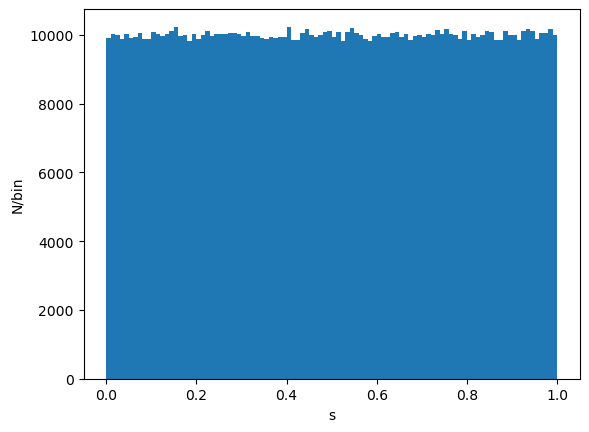

In [3]:
# Uniform distribution of N events from min to max
min=0.
max=1.
N=1000000
nbins=100  # Number of histogram bins
s = np.random.uniform(min,max,N)  # generate a uniform array of values
print('s[:5]= ',s[:5])  #Print 1st 10 values
# Build a histogram.  There are more versatile ways to do this, but we're using the simplest
h = plt.hist(s,bins=nbins,range=(min,max))  # Make a histogram of the values.  Returns the contents and the edges
edges = h[1]
h = h[0]
# print the lower bin boundary and the values
print(f'Average bin contents = {h.mean():.2f}')   # Average value IN the bins
print(f'Standard deviation = {h.std():.3f}')  # Std deviation values in the bins
plt.xlabel('s')
plt.ylabel('N/bin')
plt.show()

# Normal distribution

s[:5]=  [ 4.18817066  0.36042597 -3.8378126  -2.22632165 -2.45519537]
Average of distribution = 0.004
Sigma of distributio = 2.000


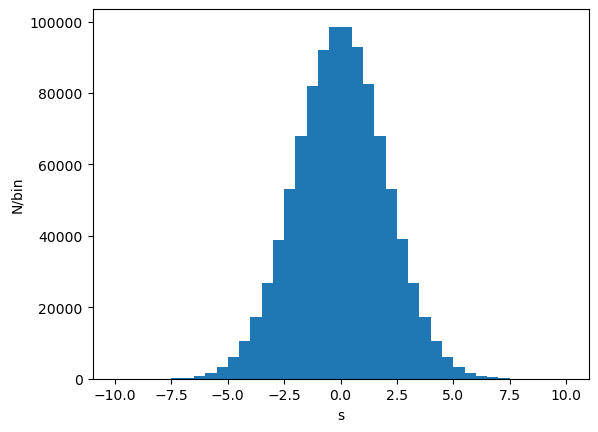

In [4]:
# Normal distribution of N events with specified mean and sigma
mean = 0.
sigma = 2.
N=1000000
nbins=40
s = np.random.normal(mean,sigma,N)  # Generate a normal distribution 
print(f's[:5]= ',s[:5])  #Print 1st 5 values
# Build a histogram
h = plt.hist(s,bins=nbins,range=(mean-5.*sigma,mean+5.*sigma))  #  with boundaries of + and - 5 sigma
# print the lower bin boundary and the values
print(f'Average of distribution = {s.mean():.3f}')
print(f'Sigma of distributio = {s.std():.3f}')
plt.xlabel('s')
plt.ylabel('N/bin')
plt.show()

# Binomial distibution 

Mean value = 50.001
Standard deviation = 5.002
Standard devation/N = 0.050


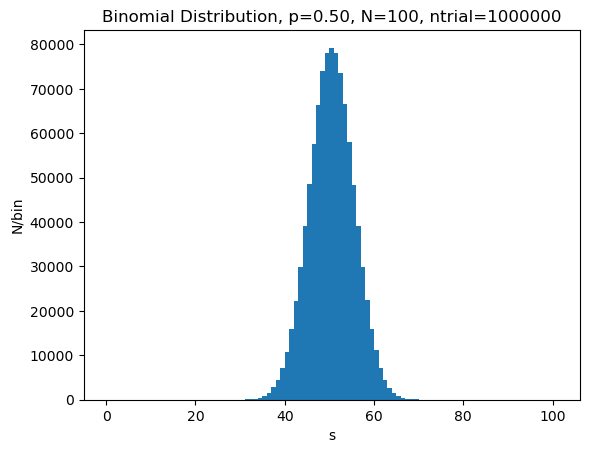

In [5]:
# Binomial Distribution with probability p and N throws
p = 1/2       # probability
N=100     # number of throws
ntrial=1000000  # number of times to repeat the experiment
s = np.random.binomial(N,p,ntrial)  # Generate a normal distribution with an RMS of 1 and a mean of zero
# Build a histogram
h = plt.hist(s,bins=N+1,range=(0,N+1))  #  Needs to go to N+1.  Why?
# Add some labels
plt.xlabel("n")
plt.ylabel("P")
plt.title("Binomial Distribution, p=%3.2f, N=%d, ntrial=%d"%(p,N,ntrial))
# print the lower bin boundary and the values
print(f'Mean value = {s.mean():.3f}')
print(f'Standard deviation = {s.std():.3f}')
print(f'Standard devation/N = {s.std()/N:.3f}')
plt.xlabel('s')
plt.ylabel('N/bin')
plt.show()

# Bin location

By default, bins plot over they range they cover.

For ingegers, this means that the value actually represents the left side of the bin.

On the other hand, when we fit distributions, it's usually more accurate to use the center of the bin.

Mean value = 50.001
Standard deviation = 5.002
Standard devation/N = 0.050


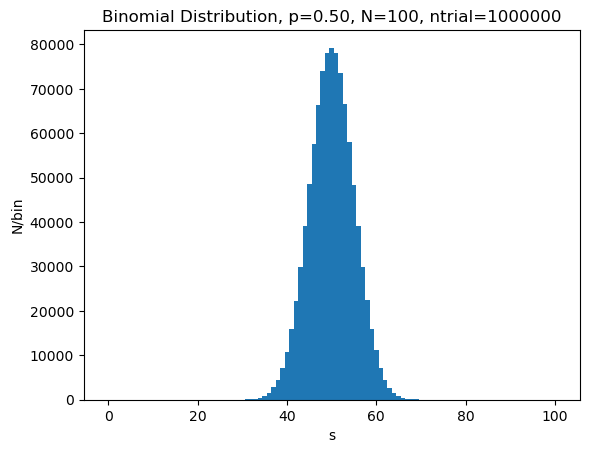

In [6]:
h = plt.hist(s,bins=N+1,range=(0,N+1),align='left')  #  Needs to go to N+1.  Why?
# Add some labels
plt.xlabel("n")
plt.ylabel("P")
plt.title("Binomial Distribution, p=%3.2f, N=%d, ntrial=%d"%(p,N,ntrial))
# print the lower bin boundary and the values
print(f'Mean value = {s.mean():.3f}')
print(f'Standard deviation = {s.std():.3f}')
print(f'Standard devation/N = {s.std()/N:.3f}')
plt.xlabel('s')
plt.ylabel('N/bin')
plt.show()

# Dice Example

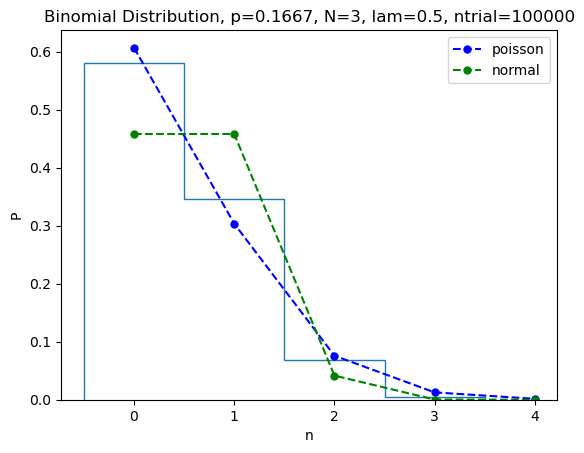

Predicted average = 0.5000
Measured average = 0.4982
Predicted standard deviation = 0.6455
Measured standard deviation = 0.6450
Standard devation/N = 0.2150


In [7]:
# Normalized probability with distributions. Also shows how to make plots
p = 1/6       # probability of one die
N=3  #number of throws
lam=p*N       # Average value
ntrial=100000  # number of times to repeat the experiment
s = np.random.binomial(N,p,ntrial)  # Generate a normal distribution with an RMS of 1 and a mean of zero
# Build a histogram.
# Normaliize (density=True)
# step function (histtype = 'step'
h = plt.hist(s,bins=N+1,range=(0,N+1),density=True,align='left',histtype='step')  #  desity = True divides by the total to get a total probability of 1
bins=h[1]  # get at the bins
hist=h[0]  # get at the contents
plt.xlabel("n")
plt.ylabel("P")
plt.title("Binomial Distribution, p=%.4f, N=%d, lam=%.1f, ntrial=%d"%(p,N,lam,ntrial))
from scipy import stats
pred1=stats.poisson.pmf(bins,lam)
plt.plot(bins,pred1,"b.--", label="poisson", ms=10)
pred2=stats.norm.pdf(bins,loc=lam,scale=np.sqrt(lam*(1-p)))
plt.plot(bins,pred2,"g.--", label="normal",ms=10)
plt.legend()
plt.show()
print("Predicted average = %.4f"%(lam))
print("Measured average = %.4f"%(s.mean()))
print("Predicted standard deviation = %.4f"%(np.sqrt(lam*(1-p))))
print("Measured standard deviation = %.4f"%(s.std()))
print('Standard devation/N = %.4f'%(s.std()/N))

# Properly normalizing a Gaussian distribution

In [8]:
# Initialize the random seed.  As long as this remainst the same, the output will remain the same
np.random.seed(57884776)

In [9]:
# Generate Nsignal events according to a Guassian distribution 
mu = 10.
sig = 3.
Nsignal=1000
ssig  = np.random.normal(mu,sig,Nsignal)

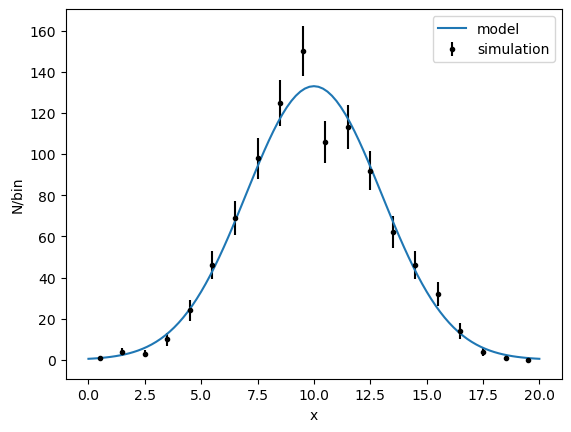

In [10]:
# Histogram them with Unit bin sizes
Nbins = 20
hist,bins = np.histogram(ssig,bins=Nbins,range=(0,Nbins))
hist_error = np.sqrt(hist)
hist_error = np.clip(hist_error,1.,None) # If the sqrt is 0, set it to 1.
xcent = .5*(bins[:-1]+bins[1:])          # Center of the bins
plt.errorbar(xcent, hist, hist_error, fmt="k.", 
             label="simulation")
xlin = np.linspace(0.,20.,101)
pl=plt.plot(xlin,Nsignal*stats.norm.pdf(xlin,loc=mu,scale=sig),label='model')
plt.xlabel('x')
plt.ylabel('N/bin')
plt.legend()
plt.show()

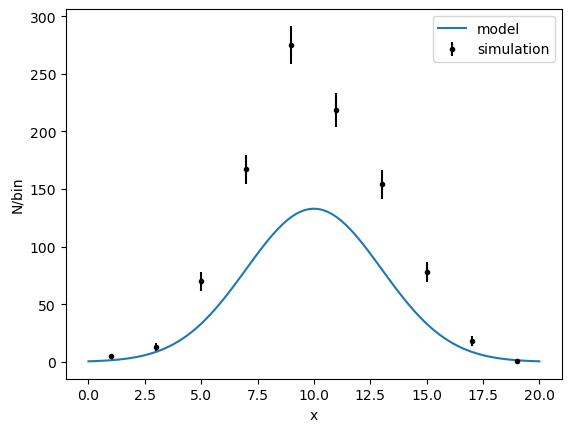

In [11]:
# Histogram them with arbitrary bin sizes
plotrange = (0.,20)
Nbins = 10
hist,bins = np.histogram(ssig,Nbins,plotrange)
hist_error = np.sqrt(hist)
hist_error = np.clip(hist_error,1.,None) # If the sqrt is 0, set it to 1.
xcent = .5*(bins[:-1]+bins[1:])
plt.errorbar(xcent, hist, hist_error, fmt="k.", 
             label="simulation")
xlin = np.linspace(0.,20.,101)
pl=plt.plot(xlin,Nsignal*stats.norm.pdf(xlin,loc=mu,scale=sig),label='model')
plt.xlabel('x')
plt.ylabel('N/bin')
plt.legend()
plt.show()


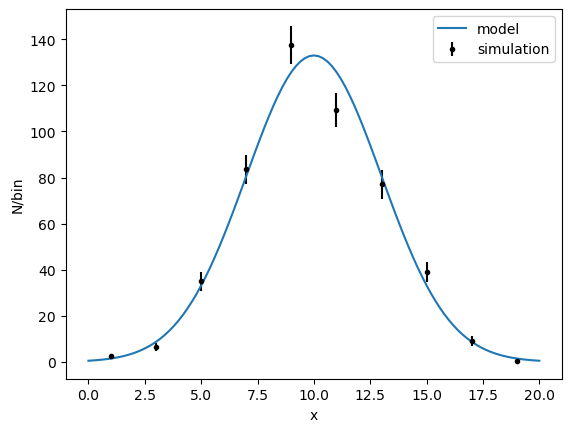

In [12]:
# Histogram them with arbitrary bin sizes
plotrange = (0.,20)
Nbins = 10
hist,bins = np.histogram(ssig,Nbins,plotrange)
hist_error = np.sqrt(hist)
hist_error = np.clip(hist_error,1.,None) # If the sqrt is 0, set it to 1.
xcent = .5*(bins[:-1]+bins[1:])
# Normalize
# Let's do it in a way that will work with arbitary bins
binsize = bins[1:]-bins[:-1]
hist = hist/binsize
hist_error /= binsize

plt.errorbar(xcent, hist, hist_error, fmt="k.", 
             label="simulation")
xlin = np.linspace(0.,20.,101)
pl=plt.plot(xlin,Nsignal*stats.norm.pdf(xlin,loc=mu,scale=sig),label='model')
plt.xlabel('x')
plt.ylabel('N/bin')
plt.legend()
plt.show()


# Arbitrary Distributions

In [13]:
# Initialize the random seed.  As long as this remains the same, the output will remain the same
np.random.seed(57884776)

In [15]:
# Returns N 1-D random numbesr based on the function myfunc, in the range xlo to xhi
# funcmax is the maximum value of funcmax
#
def mydist(func,N=1,xlo=0.,xhi=1.,funcmax=1.):
    s = np.empty(N)         # Generate an empty vector N long
    for i in range(0,N):   
        while (True):       # Loop until we find a "good" number
            x = np.random.uniform(xlo,xhi)
            if(func(x)>=funcmax*np.random.uniform()):
                break       # Exit the generation loop
        s[i]=x
    return s

In [16]:
# Test distribution function
# function x*exp(-x)
#
def distfunc(x):
    val = x*np.exp(-x)  # This is already normalized to 1
    return val

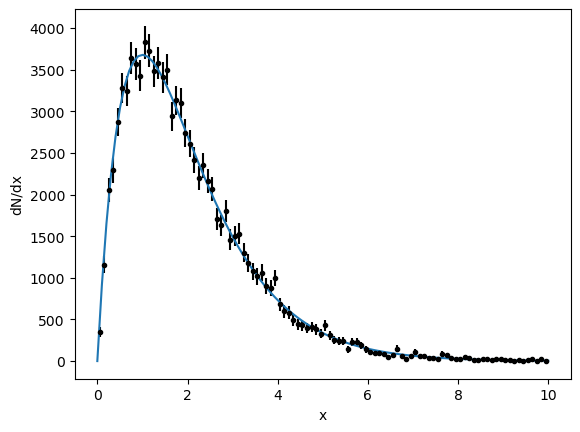

In [17]:
# Plot a histogram of my test function
Nsignal = 10000
xlo=0.
xhi=10.
plotrange = (xlo,xhi)
Nbins = 100
ssig = mydist(distfunc,Nsignal,xlo=xlo,xhi=xhi,funcmax=np.exp(-1.))
# Now do everything the way we did it before
hist,bins = np.histogram(ssig,Nbins,plotrange)
hist_error = np.sqrt(hist)
hist_error = np.clip(hist_error,1.,None) # If the sqrt is 0, set it to 1.
xcent = .5*(bins[:-1]+bins[1:])
# Normalize
# Let's do it in a way that will work with arbitary bins
binsize = bins[1:]-bins[:-1]
hist = hist/binsize
hist_error /= binsize
plt.errorbar(xcent, hist, hist_error, fmt="k.", 
             label="simulation")
xlin = np.linspace(xlo,xhi,100)
pl=plt.plot(xlin,Nsignal*distfunc(xlin))
lx = plt.xlabel("x")
ly = plt.ylabel("dN/dx")
plt.show()